In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df=pd.read_excel('amazon.xlsx')
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer Type,City,State,Country,Product Type,Product,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.6500,7,0.00,762.1845,933.57
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.3950,9,0.10,-288.7650,923.63
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.1710,9,0.10,919.9710,915.49
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,Technology,Phones,"Motorola Smart Phone, Cordless",2892.5100,5,0.10,-96.5400,910.16
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.9600,8,0.00,311.5200,903.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,CA-2013-101546,2013-12-19,2013-12-25,Standard Class,GK-14620,Grace Kelly,Corporate,Morristown,New Jersey,United States,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1793.9800,2,0.00,843.1706,225.42
824,CA-2014-154410,2014-10-22,2014-10-25,First Class,MD-17860,Michael Dominguez,Corporate,Indianapolis,Indiana,United States,Office Supplies,Storage,SAFCO Boltless Steel Shelving,909.1200,8,0.00,9.0912,225.16
825,ID-2012-31118,2012-12-26,2012-12-28,Second Class,TH-21550,Tracy Hopkins,Home Office,Bangkok,Bangkok,Thailand,Furniture,Tables,"Barricks Computer Table, Fully Assembled",1854.9297,9,0.57,-1294.3503,225.02
826,IN-2013-65677,2013-10-11,2013-10-14,First Class,HD-14785,Harold Dahlen,Home Office,Shanghai,Shanghai,China,Technology,Machines,"Epson Inkjet, Wireless",924.6600,3,0.00,397.5300,225.00


In [28]:
ndf=df['Customer Type'].value_counts().reset_index()
ndf

,Customer Type,count
0,Consumer,417
1,Corporate,251
2,Home Office,160


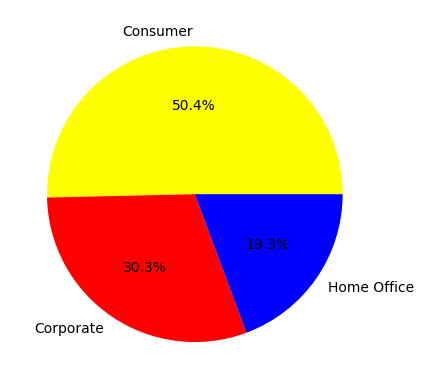

In [29]:
plt.pie(ndf['count'],labels=ndf['Customer Type'],autopct='%.1f%%',colors=['yellow','red','blue'])




plt.show()

In [30]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(
    labels=ndf['Customer Type'],
    values=ndf['count'],
    textinfo='percent',
    hoverinfo='label+percent',
    marker=dict(colors=['yellow', 'red', 'blue'])
)])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)

fig.show()

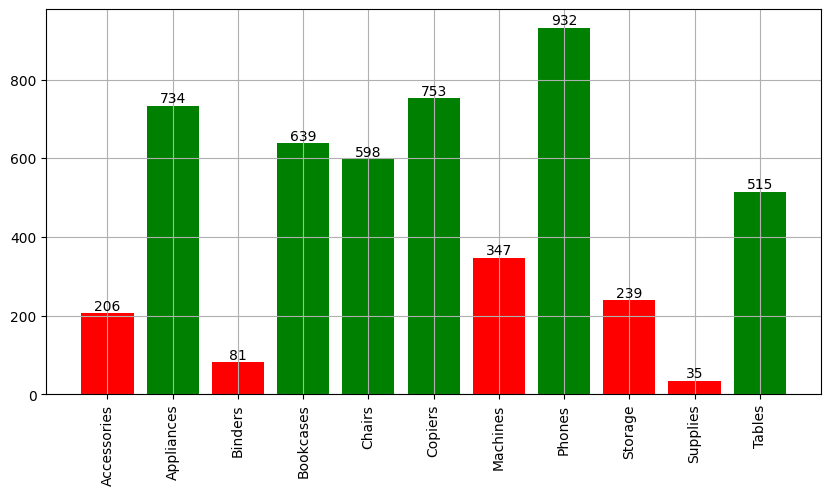

In [34]:
ndf=df.groupby('Product').agg(
    total=('Quantity','sum')
).reset_index()
ndf
l=[]
for i in ndf['total']:
    if i>=500:
        l.append('green')
    else:
        l.append('red')

plt.figure(figsize=(10,5))

plt.bar(ndf['Product'],ndf['total'],color=l)
plt.xticks(rotation=90)
for m,n in zip(ndf['Product'],ndf['total']):
    plt.text(x=m,y=n,s=n,ha='center',va='bottom')
plt.grid()

plt.show()


In [46]:
ndf

,Year,total_sale,total_profit
0,2011,346027.73446,64894.06296
1,2012,368975.44166,51475.36366
2,2013,515047.22180,98375.46250
3,2014,657953.46920,117825.41600


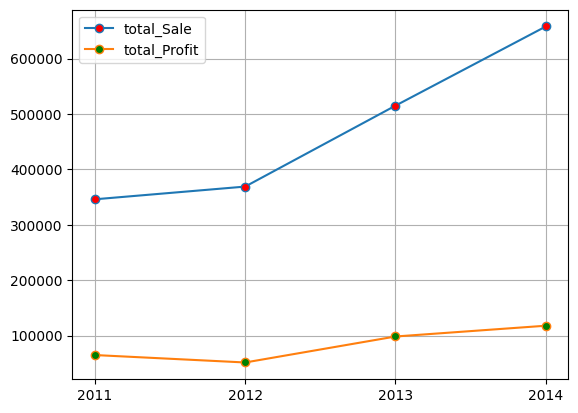

In [50]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Year']=df['Order Date'].dt.year
df['month']=df['Order Date'].dt.month
ndf=df.groupby('Year').agg(
    total_sale=('Sales','sum'),
    total_profit=('Profit','sum')
).reset_index()
ndf['Year']=ndf['Year'].astype(str)
plt.plot(ndf['Year'],ndf['total_sale'],marker='o',markerfacecolor='red',label='total_Sale')
plt.plot(ndf['Year'],ndf['total_profit'],marker='o',markerfacecolor='green',label='total_Profit')
plt.grid()
plt.legend()


plt.show()

In [72]:
ndf

,Country,total
81,United States,83689.2926
34,India,30792.9300
5,Australia,26579.6220
16,China,25909.8270
80,United Kingdom,22296.4770
...,...,...
78,Turkey,-2783.9280
61,Portugal,-3059.8200
43,Lithuania,-3923.0160
57,Pakistan,-5086.1070


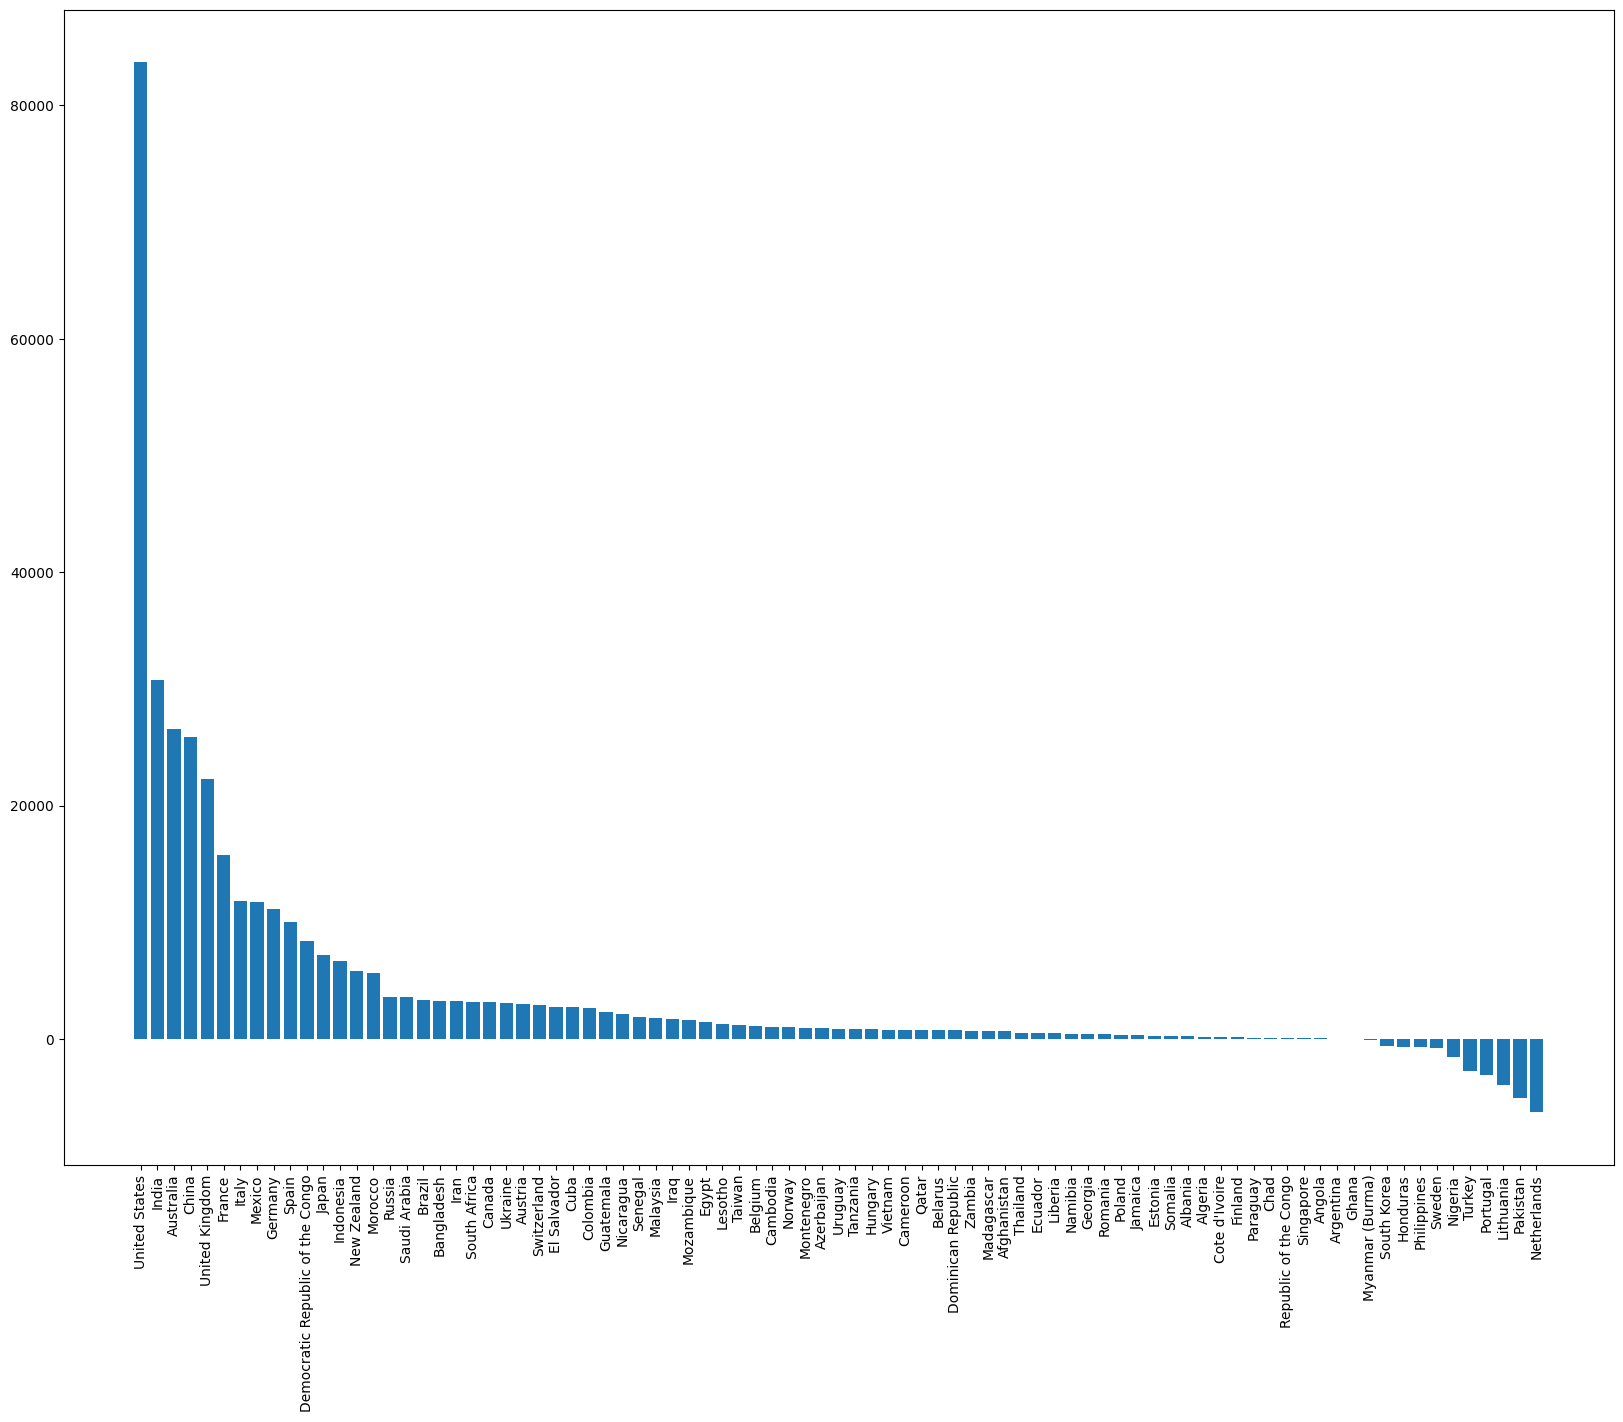

In [71]:
ndf=df.groupby('Country').agg(
    total=('Profit','sum')
).reset_index()
ndf=ndf.sort_values(by='total',ascending=False)
plt.figure(figsize=(20,15))
plt.bar(ndf['Country'],ndf['total'])
plt.xticks(rotation=90)


plt.show()

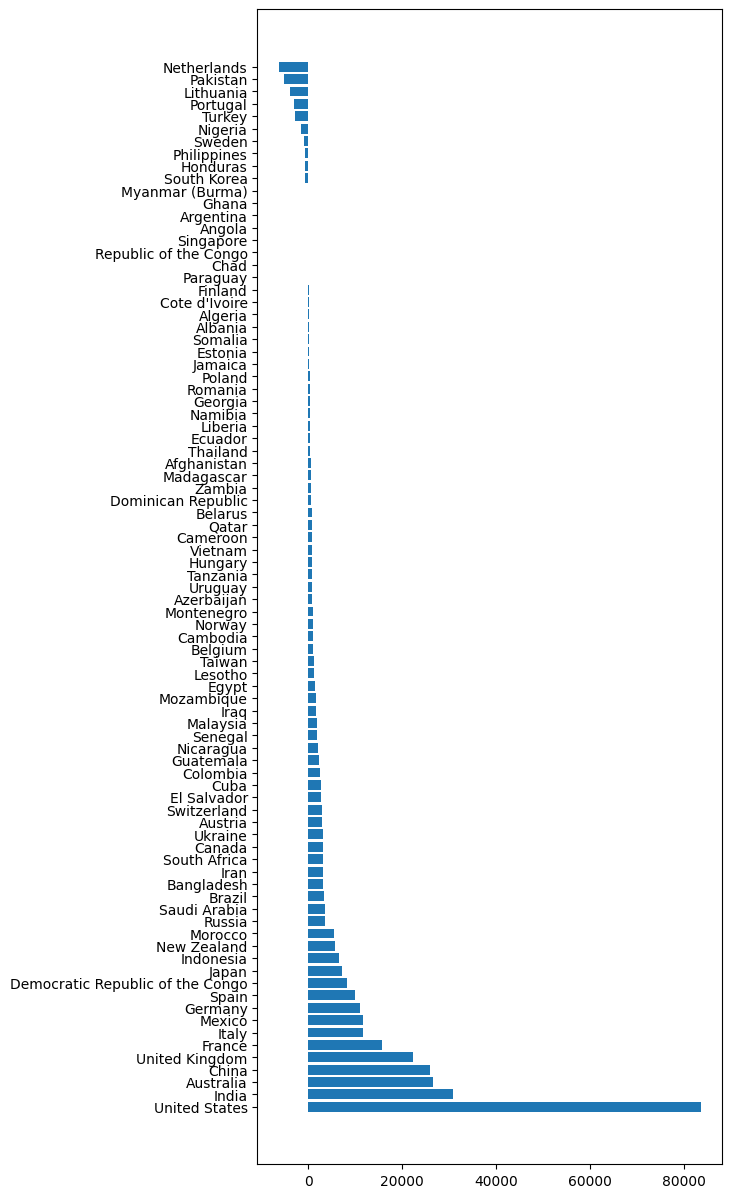

In [73]:
plt.figure(figsize=(6,15))
plt.barh(ndf['Country'],ndf['total'])

plt.show()